In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("cs1090a_hw3.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science: 

## Homework 3: Polynomial and LASSO Regression

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Pavlos Protopapas, Natesh Pillai, and Chris Gumb

<hr style="height:2.4pt">

In [2]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

<div style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">

### Instructions
- To submit your notebook, follow the instructions given in on the Canvas assignment page.
- Plots should be legible and interpretable *without having to refer to the code that generated them*. They should include labels for the $x$- and $y$-axes as well as a descriptive title and/or legend when appropriate.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you believe the plot *means*.
- Autograding tests are mostly to help you debug. The tests are not exhaustive so simply passing all tests may not be sufficient for full credit.
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. Please get course staff approval before importing any additional 3rd party libraries.
- Enable scrolling output on cells with slighlty longer output. Avoid excessively long output.
- Feel free to add additional code or markdown cells as needed.
- Don't forget to include a written response when one is requested by a question prompt.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells (note that this can take a few minutes). 
- **You should do a "Restart Kernel and Run All Cells" before submitting to ensure (1) your notebook actually runs and (2) all output is visible**
</div>

### Import Libraries

In [3]:
from collections import Counter
import math
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle

from warnings import simplefilter
simplefilter('ignore', category=FutureWarning)

In [4]:
# For calculating total notebook runtime
notebook_start = time.time()

<a id="contents"></a>

## Notebook contents

- [**Overview and data description**](#intro)


- [**Question 1: Data visualization [4 pts]**](#part1)

- [**Your Homework 3 roadmap**](#roadmap)


- [**Question 2: Guesstimate the polynomial relationship [22 pts]**](#part2)

- [**Question 3: Use a validation set to find the most promising polynomial relationship [12 pts]**](#part3)

- [**Question 4: Finding the best model by k-fold cross validation [14 pts]**](#part4)

- [**Question 5: Finding the most consistent model using k-fold cross validation with bootstraps [16 pts]**](#part5)

- [**Question 6: Improving model consistency with LASSO regularization [26 pts]**](#part6)

- [**Question 7: Analyze your best test MSEs for each section of the homework [6 pts]**](#part7)

<a id="intro"></a>

## Overview and data description

[Return to contents](#contents)

### Predicting percentage change in bacteria populations given their spreading factor

In this homework, we will explore polynomial regression for modeling a quantitative variable. Specifically, we will model the percent change in a bacteria population after 4 hours as a function of the bacteria's "spreading factor".

**The data set for this problem has already been split for you.** You will find the train and test data sets in the files `data/bacteria_train.csv` and `data/bacteria_test.csv`, respectively.

### Problem Description

We will predict the percentage change in population, given the spreading factor. Thus, we will consider the `Spreading_factor` to be our predictor variable and `Perc_population` to be our response variable. Using mean squared error ($MSE$) as an evaluative criteria, we will explore several different approaches for finding the best fit and most robust polynomial regression for modeling this relationship.

<a id="part1"></a>

## <div class='exercise'>Question 1: Data visualization [4 pts]</div> 
    
[Return to contents](#contents)
    

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.1</b></div>

Generate a *well-labeled* scatter plot of the data points in the `bacteria_train.csv` file with the spreading factor on the $x$-axis and the percentage change on the $y$-axis.

In [5]:
# your code here
df_train = pd.read_csv("data/bacteria_train.csv")
df_test = pd.read_csv("data/bacteria_test.csv")

df_train

,Perc_population,Spreading_factor
0,1.535,0.190708
1,5.555,0.326928
2,-0.277,-0.459699
3,1.724,-0.193013
4,-0.550,-0.835745
...,...,...
418,-0.461,-1.536030
419,2.179,1.445470
420,6.328,1.107800
421,3.854,0.841114


Text(0.5, 1.0, 'Scatter Plot of the Spreading Factor  the Percent Change of Population')

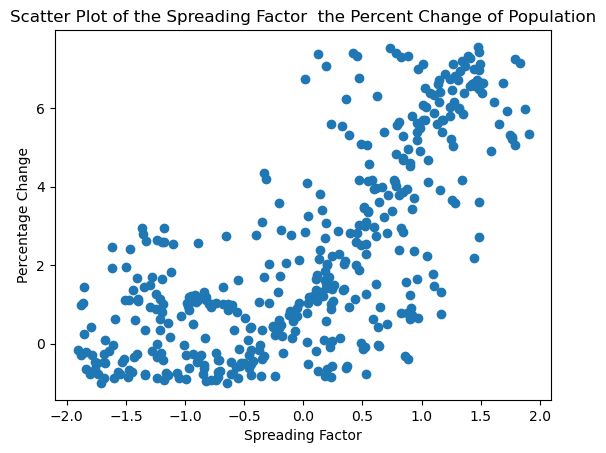

In [6]:
x_train = df_train["Spreading_factor"]
x_test = df_test["Spreading_factor"]
y_train = df_train["Perc_population"]
y_test = df_test["Perc_population"]



plt.scatter(x_train,y_train )

# Add labels and title
plt.xlabel('Spreading Factor')
plt.ylabel('Percentage Change')
plt.title('Scatter Plot of the Spreading Factor  the Percent Change of Population')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.2</b></div>

Based on the graph above, is there any discernable relationship between the spreading factor and percentage change in population? If so, how would you describe this relationship?

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

Based on the above graph there does appear to be a mostly positive relationship between the spreading factor and percentage change in population. I would describe this relationship moreso as a quadratic one where it may decrease a bit at the start and then increase quadratically once it hits a minimum percentage change.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

<!-- END QUESTION -->

<a id="roadmap"></a>

<hr style='height:2px'> 

## Your Homework 3 roadmap

[Return to contents](#contents)

**We will be following this roadmap throught the notebook**

![](./data/roadmap.png)


<a id="part2"></a>

## <div class='exercise'>Question 2: Guesstimate the polynomial relationship [22 pts]</div> 

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.1</b></div>

Based on your inspection in question 1, guesstimate the degree of the polynomial you believe would best fit the training while still generalizing well. Store this degree in the variable `guessed_deg`. 

Next, use `PolynomialFeatures()` to generate a design matrices of the guesstimated degree for the train and test data. Store these in `x_poly_train` and `x_poly_test`. 

**Notes:**
- **You don't need to scale your data in this assignment** (you can inspect the data to see why this might not be necessary)
- **You should *not* include a bias in the design matrix you intend to pass to the linear regression's `fit` method.**

In [7]:
# your code here
guessed_deg = 2


In [8]:
poly = PolynomialFeatures(guessed_deg, include_bias=False)

x_train = df_train["Spreading_factor"].values.reshape(-1, 1)  # Reshape to 2D
x_test = df_test["Spreading_factor"].values.reshape(-1, 1)    # Reshape to 2D


x_poly_train = poly.fit_transform(x_train)


x_poly_test = poly.transform(x_test)

In [9]:
#df_poly_train = pd.DataFrame(poly.transform(df_train), columns=poly.get_feature_names_out())

#x_poly_train = df_poly_train[["Spreading_factor", "Spreading_factor^2"]]
#x_poly_train = x_poly_train.values


#df_poly_test = pd.DataFrame(poly.transform(df_test), columns=poly.get_feature_names_out())

#x_poly_test = df_poly_test[["Spreading_factor", "Spreading_factor^2"]]
#x_poly_test = x_poly_test.values

In [10]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.2</b></div>

Fit a polynomial regression using scikit-learn's `LinearRegression()` on the training design matrix. 

To track and compare the performance of each of the models in this notebook, use a list of dictionaries called `results`.

Each dictionary in this list will have the keys: 'model' (a string representing the question number where the model was fit), 'train_mse', and 'test_mse'.

So, for this question, you will append a dictionary to `results` of the form:
```python
{'model': '2.2', 'train_mse': 2.6749 'test_mse': 2.734}
```
Note that your MSE scores will not be the same as those in the example dictionary.

**Hint:** Because you will be calculating MSEs for models through this notebook, you may want to abstract this process into a function for re-use.

In [11]:
results = []

In [12]:
# Fit a linear regression model
# your code here
linreg = LinearRegression().fit(x_poly_train, y_train)

y_hat_train = linreg.predict(x_poly_train)
y_hat_test = linreg.predict(x_poly_test)


lin_train_mse = mean_squared_error(y_train, y_hat_train)
lin_test_mse = mean_squared_error(y_test, y_hat_test)

results.append({'model': '2.2', 'train_mse':lin_train_mse, 'test_mse': lin_test_mse})

In [13]:
# Display your results thus far.
pd.DataFrame(results)

,model,train_mse,test_mse
0,2.2,2.661715,2.674863


In [14]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.3</b></div>

- Create a plot showing both the train and test data, as well as your model's prediction curve.
- Display `results` as a DataFrame.
- Explain the rationale for your choice of degree (i.e. your "guesstimation") and comment on the fit of your model.
  

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

I chose a degree 2 polynomial as to me it looked like the model perhaps slightly decreased at the start and then increased quadratically as the spreading effect got larger. The model seems to fit somewhat well, although I think it could be a bit better as the increase appears to be faster than what is currently being presented.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [15]:
pd.DataFrame(results)

,model,train_mse,test_mse
0,2.2,2.661715,2.674863


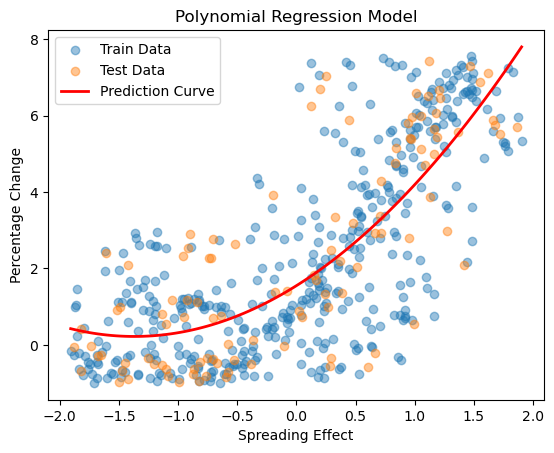

In [16]:
# your code here

plt.scatter(x_train, y_train, alpha=0.45, label='Train Data')
plt.scatter(x_test, y_test, alpha=0.45, label='Test Data')

x_range = np.linspace(min(x_train), max(x_train), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)  
y_pred_range = linreg.predict(x_range_poly)

plt.plot(x_range, y_pred_range, color='red', label='Prediction Curve', linewidth=2)


plt.xlabel('Spreading Effect')
plt.ylabel('Percentage Change')
plt.title('Polynomial Regression Model')
plt.legend()

plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.4</b></div>

Now we will compute confidence intervals for the coefficients generated by our model specification. For the same degree polynomial regression fit above in 2.2, compute and plot the 95% confidence interval of the beta (i.e. $\beta$) values obtained in that regression model. Be certain to meet these primary requirements:
- Report the coefficient values of the model fit above in 2.2.
- Use bootstrapping to generate your 95% confidence intervals by refitting your model to each bootstrapped sample of your training data. You should use **100 bootstrapped samples**.
- For each bootstrap, store the coefficients of the model, and use those stored coefficients to compute the $2.5$ and $97.5$ confidence bounds.
- Plot the bootstrapped coefficients as a grid of histograms, one histogram for each $\beta_i$, illustrating the distribution of bootstrapped coefficients for each $\beta_i$. Each distribution should indicate the regions of 95% confidence. Use `plt.subplots(...)` to arrange your histograms as a grid of plots.
- Comment on your findings.

**Note:** Our use of the term "coefficients" includes the intercept. So the intercept should also get a confidence interval plot.

**Hints:** Wrapping your plotting code in a function may make the solution to the next question more concise.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

In [17]:
print(f'The B1 coefficient of the model for 2.2 is: {linreg.coef_[0]}')

The B1 coefficient of the model for 2.2 is: 1.9379680565747681


In [18]:
print(f'The B2 coefficient of the model for 2.2 is: {linreg.coef_[1]}')

The B2 coefficient of the model for 2.2 is: 0.7063789121219991


In [19]:
print(f'The intercept of the model for 2.2 is: {linreg.intercept_}')

The intercept of the model for 2.2 is: 1.5479189777983193


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [20]:
# your code here
n_boots=100
boot_models = []
boot_betas = []



for i in range(n_boots):

    boot_i = np.random.choice(len(x_train), replace=True, size=len(x_train)) 

   
    x_train_boot = x_train[boot_i]  
    y_train_boot = y_train[boot_i]  
    
   
    x_poly_train_boot = poly.fit_transform(x_train_boot.reshape(-1, 1))
   
    boot_linreg = LinearRegression().fit(x_poly_train_boot, y_train_boot)

    
    boot_models.append(boot_linreg)
    
    # Extract and save coefficients from the trained model
    coefs = np.concatenate(([boot_linreg.intercept_], boot_linreg.coef_))  # Combine intercept and coefficients
    boot_betas.append(coefs)

In [21]:
boot_betas_df = pd.DataFrame(boot_betas)
boot_betas_df.columns = ['Intercept', 'Beta_One','Beta_Two']
boot_betas_df.describe()

,Intercept,Beta_One,Beta_Two
count,100.000000,100.000000,100.000000
mean,1.552824,1.943272,0.708931
std,0.103188,0.077153,0.073272
min,1.335402,1.749401,0.555578
25%,1.481228,1.896502,0.664450
50%,1.557331,1.943916,0.704379
75%,1.615441,1.990969,0.756681
max,1.792263,2.126435,0.900303


In [22]:
stats_list = []
coef_names_final=["Intercept","Beta_One","Beta_Two"]
# Loop through each feature to compute its bootstrapped statistics
for i in range(3):
    
    # Extracting the bootstrapped coefficient values for the current feature
    betavals = boot_betas_df.iloc[:, i]
    
    # Sorting the coefficient values to aid in percentile calculation
    betavals.values.sort()
    
    # Calculating the 2.5th percentile - lower bound of the 95% CI
    x1 = np.round(np.percentile(betavals, 2.5), 2)
    
    # Calculating the 97.5th percentile - upper bound of the 95% CI
    x2 = np.round(np.percentile(betavals, 97.5), 2)
    
    # Calculating mean and standard deviation of the bootstrapped coefficients
    mean = np.round(np.mean(betavals),2)
    std = np.round(np.std(betavals),2)
    
    # Appending computed statistics for current feature to the stats_list
    stats_list.append([coef_names_final[i], mean, std, x1, x2])

# Convert the stats_list into a dataframe for easy visualization and analysis
boot_beta_df = pd.DataFrame(stats_list, columns=['feature', 'boot_mean', 'boot_std', '95_low', '95_high'])


In [23]:
boot_beta_df

,feature,boot_mean,boot_std,95_low,95_high
0,Intercept,1.55,0.10,1.35,1.76
1,Beta_One,1.94,0.08,1.80,2.10
2,Beta_Two,0.71,0.07,0.56,0.85


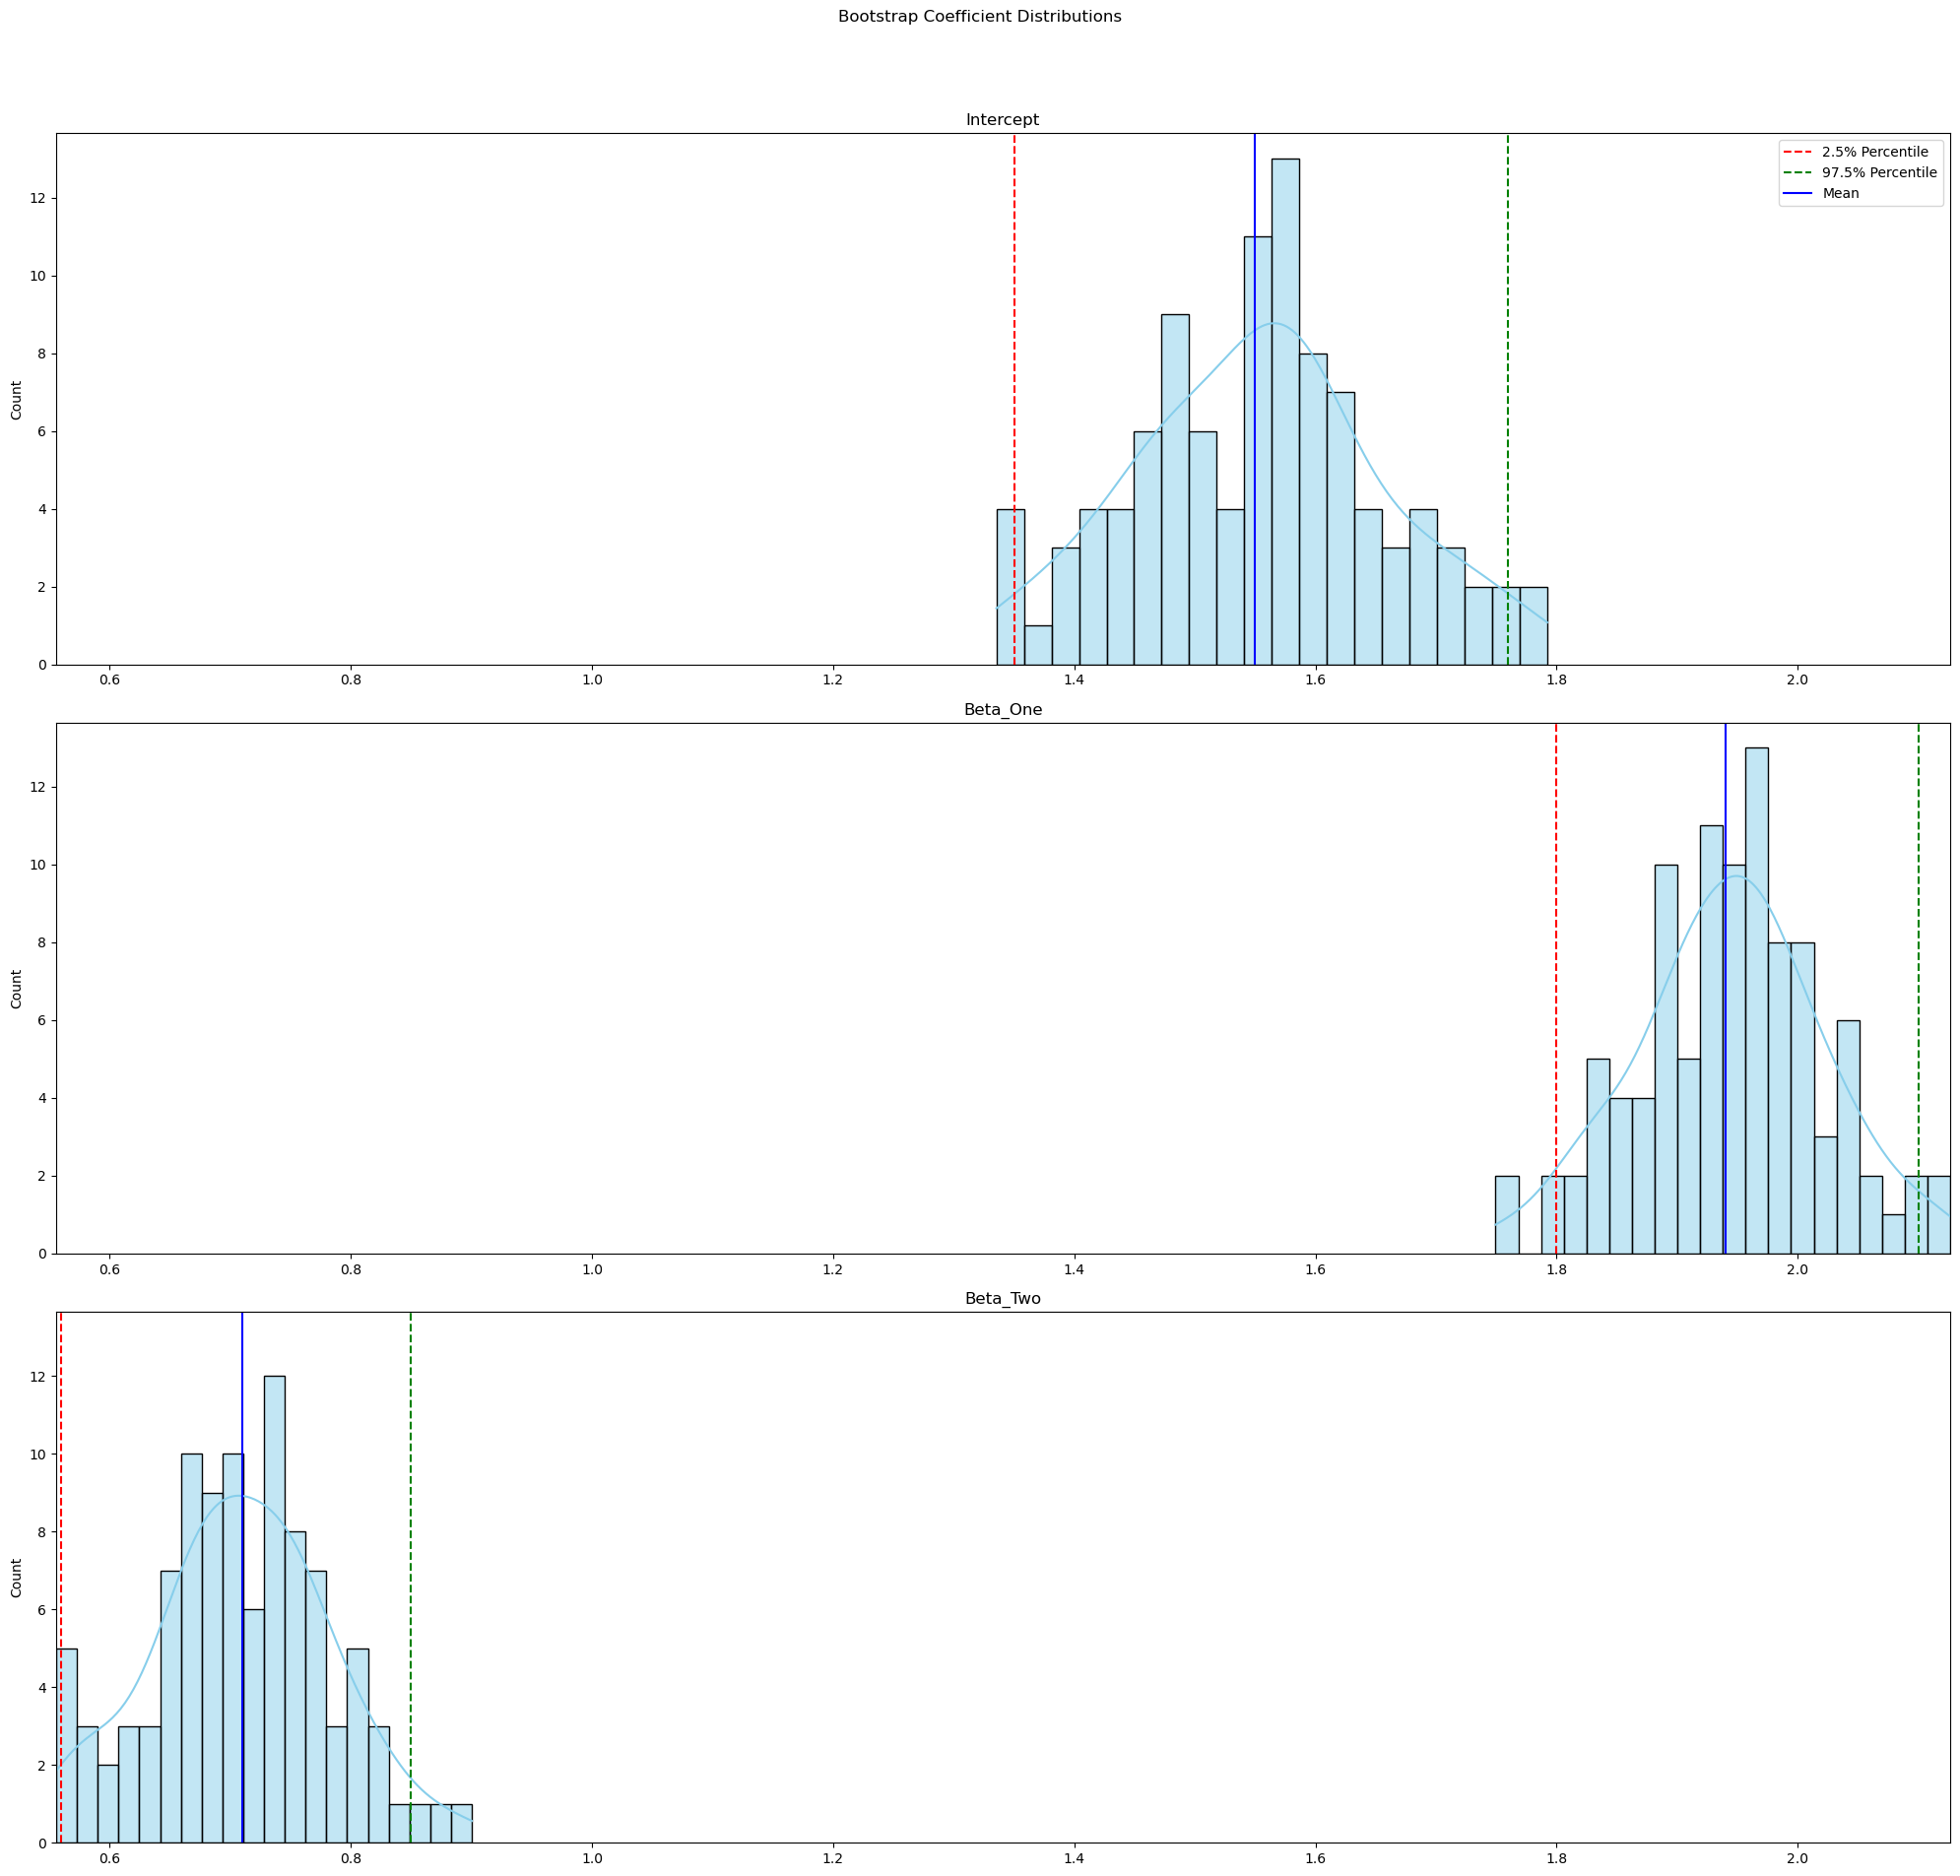

In [24]:
fig, axs = plt.subplots(3, figsize=(20, 20), sharey=True)
axs = axs.ravel()

# For shared range (while including x-ticks on each axis)
x_min = boot_betas_df.min().min()
x_max = boot_betas_df.max().max()

# Looping through each feature to plot histograms and confidence intervals

for i, (index, row) in enumerate(boot_beta_df.iloc[0:].iterrows()):
    sns.histplot(boot_betas_df.iloc[:, i], bins = 20, ax=axs[i], kde=True, color='skyblue', edgecolor='black')


    
    axs[i].set_title(row['feature'])
    axs[i].axvline(row['95_low'], color='red', linestyle='--', label='2.5% Percentile')
    axs[i].axvline(row['95_high'], color='green', linestyle='--', label='97.5% Percentile')
    axs[i].axvline(row['boot_mean'], color='blue', linestyle='-', label='Mean')
    x_min = boot_betas_df.min().min()
    x_max = boot_betas_df.max().max()
    axs[i].set_xlim((x_min, x_max))
    axs[i].set_xlabel('')
axs[0].legend()
# remove unneeded final axis
#axs[-1].axis('off')
plt.suptitle("Bootstrap Coefficient Distributions")
# Adjusting layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

The Confidence intervals indicate that all of the coefficients are statistically significant at alpha=5 percent as the 95 % confidence interval does not contain the value of 0 for any of them. Also, since Beta 1 and Beta 2 are both positive, this indicates that at values before the point that minimizes the model, the model is decreasing. At points after the minimum, it is increasing.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.5</b></div>

Linear regression can be viewed probabilistically, with deviations from the regression line attributed to an error term, $ \epsilon $, distributed as:

$$ \epsilon \sim N(0, \sigma^2) $$

In this question, you'll estimate confidence intervals for the regression coefficients based on this probabilistic perspective. Follow these steps:

1. Compute $ \hat{\sigma}_\epsilon^2 $, an estimate for the variance of the error term.
2. Utilizing this estimated variance, derive the standard errors for your regression coefficients.
3. Construct 95% confidence intervals for the coefficients using their standard errors. For the z-value, use 1.96.
4. Visualize the 95% confidence intervals alongside those from the bootstrap method. The values of the interval bounds should be made explicit in the plot.

**Hints:**
- Ensure your design matrix, $ X $, includes an intercept column to compute a confidence interval for $ \beta_0 $.
- Bootstrap samples play no role in this calculation.

If we assume tht the error is distributed normally N(0,sigma^2), then we can use the formula given in lecture  9 at the end of the bootstrapping slides, which is : sigma = sqrt((n*MSE)/(n-2))

In [25]:
# your code here
n= len(x_poly_train)
mse= lin_train_mse
n,p= x_poly_train.shape
variance = (n*mse)/(n-p-1)
variance

np.float64(2.6807273812549344)

Now we can use the formulas for the standard errors of the coefficients. It is a seperate formula for the intercept and the other two.
Covariance matrix = (X^T * X)^-1 * variance

In [26]:
intercept_column = np.ones((x_poly_train.shape[0], 1))


x_poly_train_with_intercept = np.hstack([intercept_column, x_poly_train])

xtx = np.dot(x_poly_train_with_intercept.T, x_poly_train_with_intercept)


xtx_inv = np.linalg.inv(xtx)


cov_matrix = xtx_inv * variance 

Now I will use the covariance matrix, as the diagonal elements are the variances of each of the coefficients, including the intercept.

In [27]:
Beta_variances = np.diag(cov_matrix)

In [28]:
Beta_std = np.sqrt(Beta_variances)
Beta_std

array([0.11555315, 0.08116661, 0.08496638])

In [29]:
confidence_intervals = []

lower_bound = linreg.intercept_ - 1.96 * Beta_std[0]
upper_bound = linreg.intercept_ + 1.96 * Beta_std[0]
confidence_intervals.append((lower_bound, upper_bound))

for i in range(2):
    lower_bound = linreg.coef_[i] - 1.96 * Beta_std[i+1]
    upper_bound = linreg.coef_[i] + 1.96 * Beta_std[i+1]
    confidence_intervals.append((lower_bound, upper_bound))


In [30]:
confidence_intervals

[(np.float64(1.3214348076772449), np.float64(1.7744031479193938)),
 (np.float64(1.7788814969798725), np.float64(2.0970546161696637)),
 (np.float64(0.5398448080405613), np.float64(0.8729130162034369))]

Text(0.5, 0.98, 'Bootstrap Coefficient Distributions')

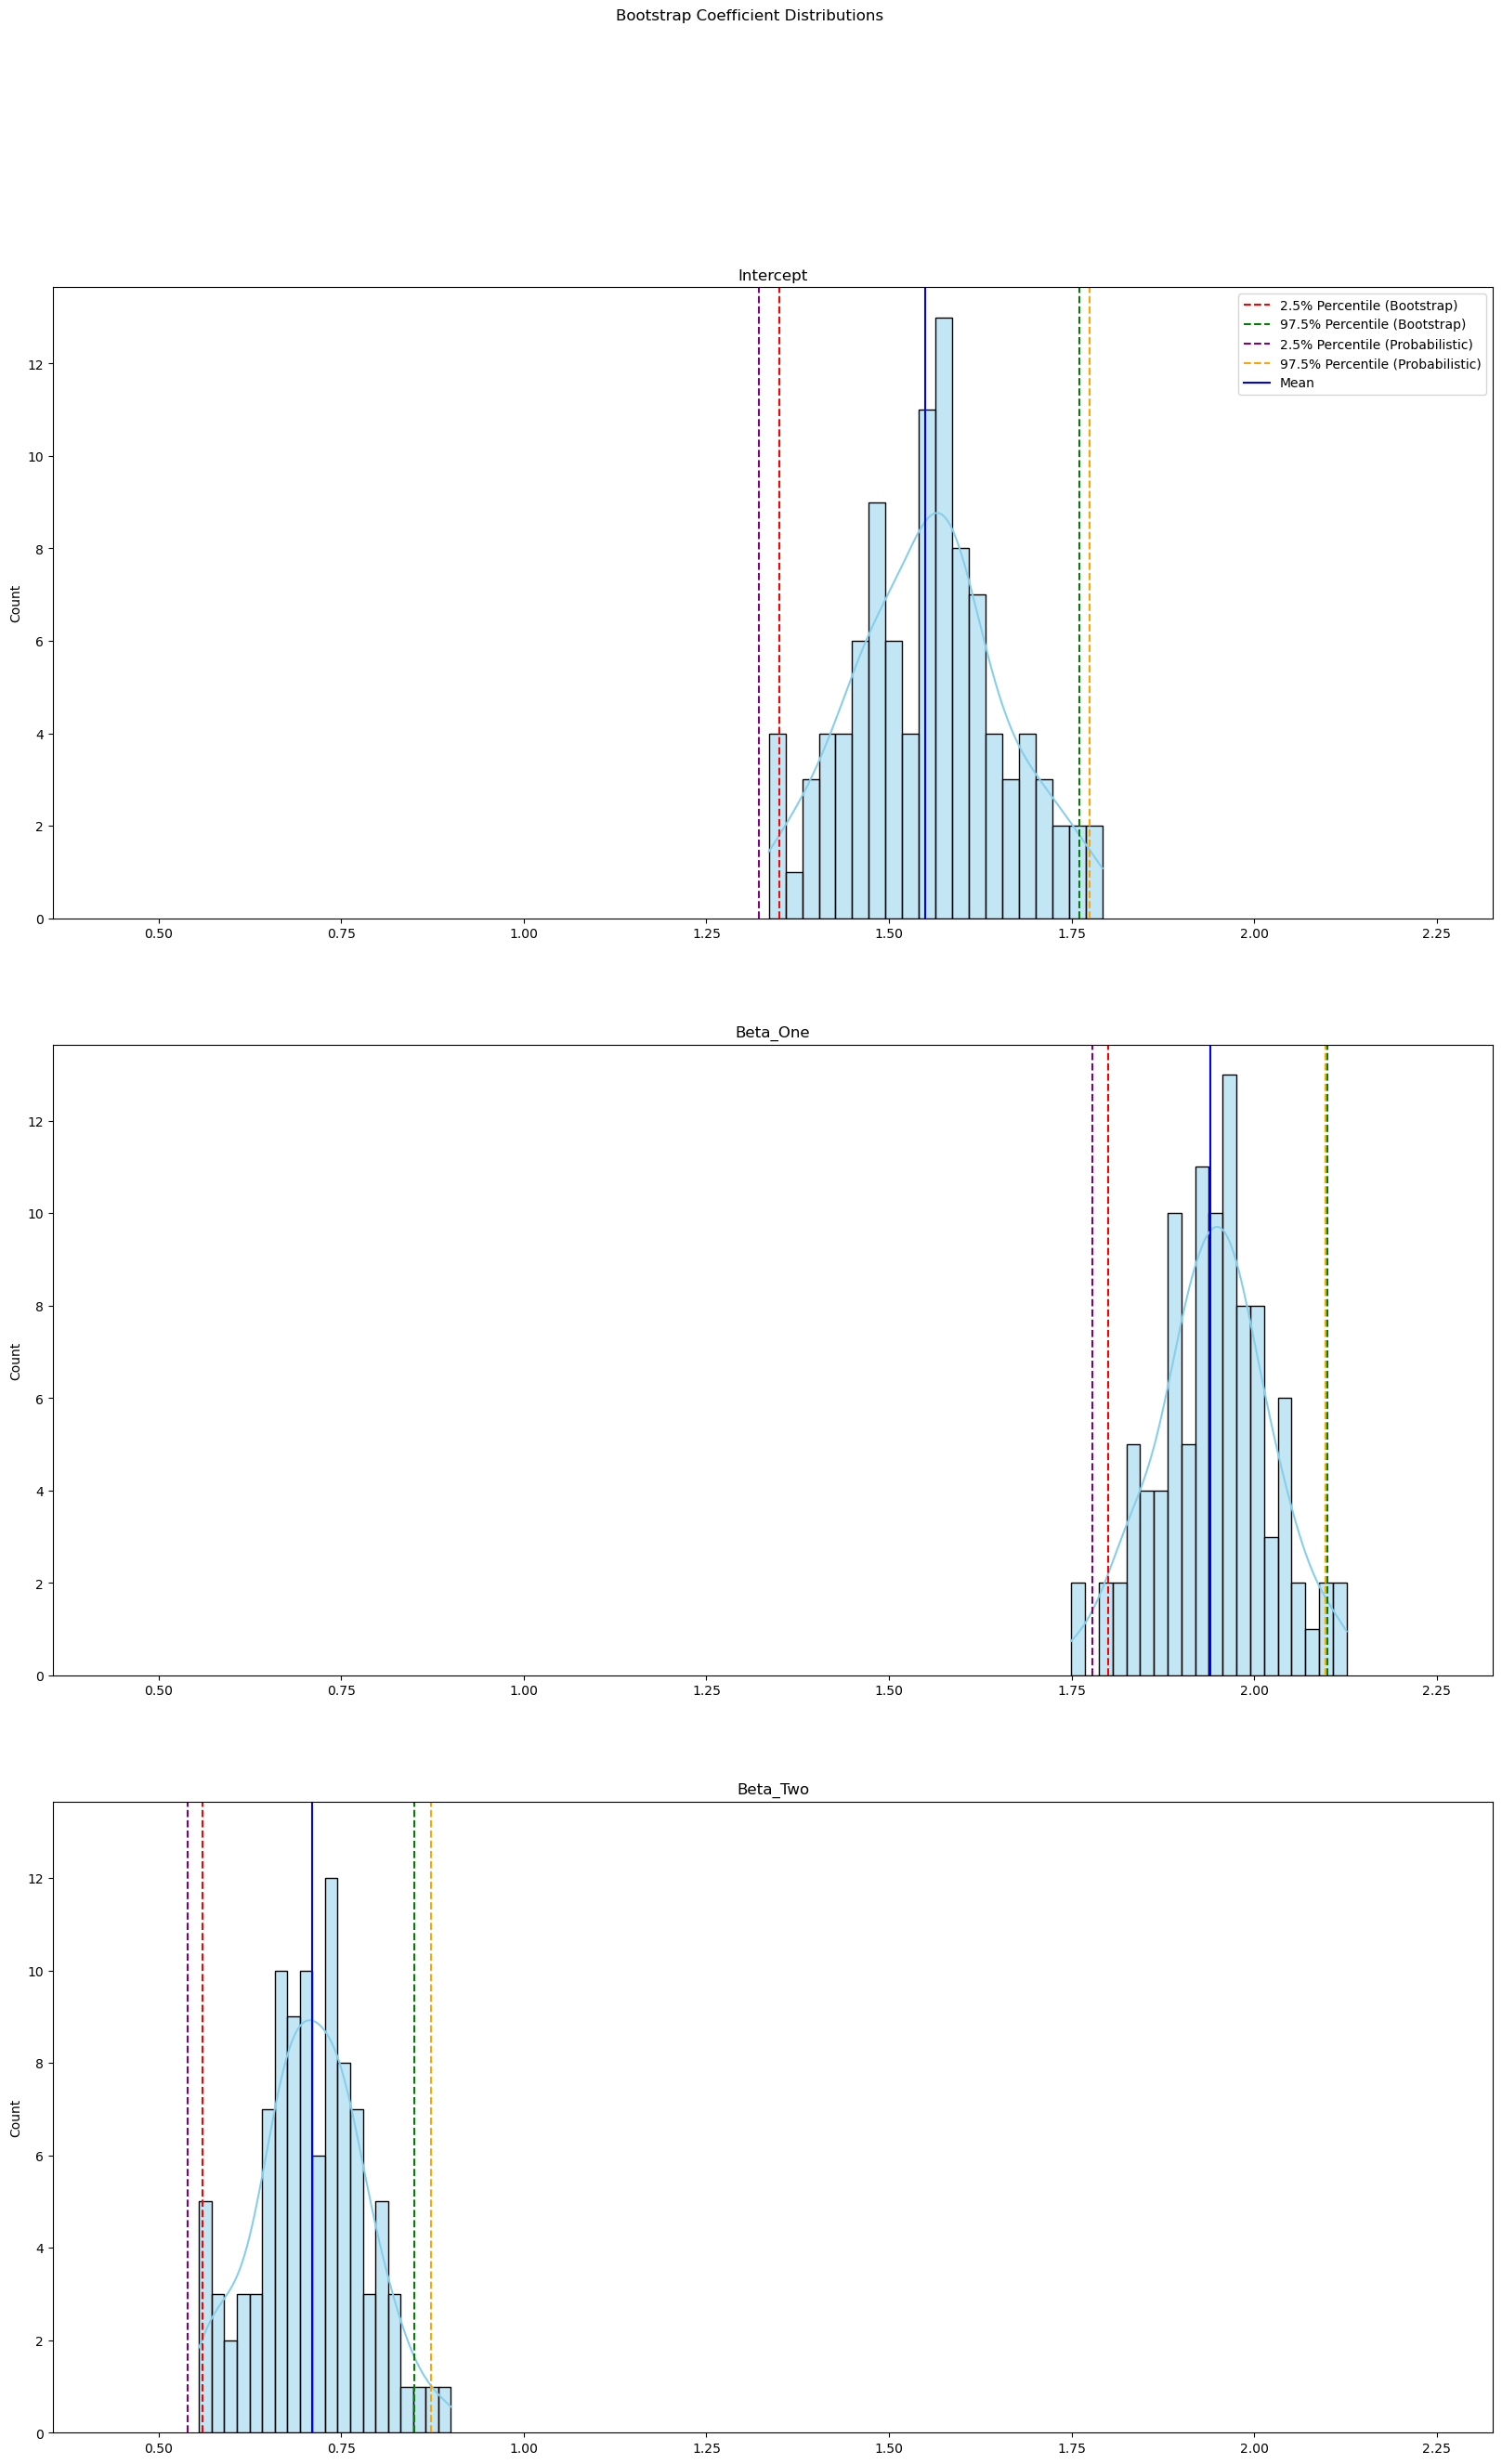

In [31]:
fig, axs = plt.subplots(3, figsize=(20, 30), sharey=True)
axs = axs.ravel()

# For shared range (while including x-ticks on each axis)
x_min = boot_betas_df.min().min()
x_max = boot_betas_df.max().max()

# Looping through each feature to plot histograms and confidence intervals

for i, (index, row) in enumerate(boot_beta_df.iloc[0:].iterrows()):
    sns.histplot(boot_betas_df.iloc[:, i], bins = 20, ax=axs[i], kde=True, color='skyblue', edgecolor='black')


    
    axs[i].set_title(row['feature'])
    axs[i].axvline(row['95_low'], color='red', linestyle='--', label='2.5% Percentile (Bootstrap)')
    axs[i].axvline(row['95_high'], color='green', linestyle='--', label='97.5% Percentile (Bootstrap)')
    axs[i].axvline(confidence_intervals[i][0], color='purple', linestyle='--', label='2.5% Percentile (Probabilistic)')
    axs[i].axvline(confidence_intervals[i][1], color='orange', linestyle='--', label='97.5% Percentile (Probabilistic)')
    axs[i].axvline(row['boot_mean'], color='blue', linestyle='-', label='Mean')
    x_min = boot_betas_df.min().min()
    x_max = boot_betas_df.max().max()
    axs[i].set_xlim((x_min-0.2, x_max+0.2))
    axs[i].set_xlabel('')
axs[0].legend()
# remove unneeded final axis
#axs[-1].axis('off')
plt.suptitle("Bootstrap Coefficient Distributions")
# Adjusting layout
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.6</b></div>

Reflect on the differences between the two sets of confidence intervals. Demonstrate at least one diagnostic making use of the model and/or training data to explore the potential reasons for any observed discrepancies in the confidence intervals. Be sure to explain the relevance of your diagnostic(s) to this particular task and interpret the results.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

The confidence interval for the probabilistic method is bigger for all of the coefficients. One reason for the discrepancy is that our assumption that the error terms are normally distributed with constant variance may not be correct with our actual data. The probabilistic method for calculating the confidence interval depends on this assumption, while the bootstrap method does not. To check if the assumption is true, we can plot the residuals and see if they are homoscedastic or not. If they are not homoscedastic, this indicates that the errors do not have a constant variance and that the assumption for the probabilistic method is wrong. As such it would give us a different result as that of the bootstrap.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

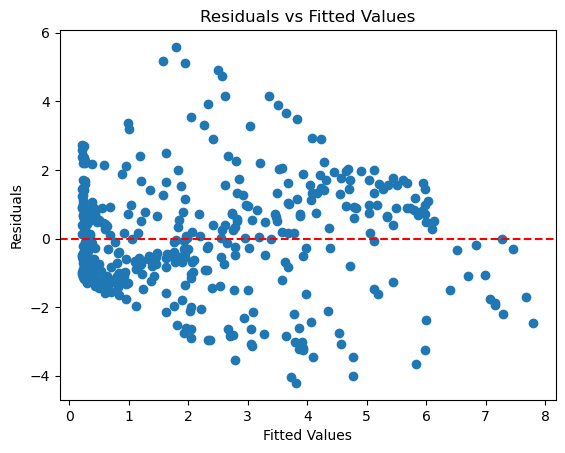

In [32]:
# your code here
y_train_pred = linreg.predict(x_poly_train)


residuals = y_train - y_train_pred

# Plot residuals vs fitted values
plt.scatter(y_train_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

As we can see, the errors are indeed not homoscedastic as they appear to have  a negative trend as the fitted values get higher. Therefore, the assumption was incorrect, perhaps explaining partially why the confidence intervals are not the same.

<!-- END QUESTION -->

<a id="part3"></a>

## <div class='exercise'>Question 3: Single validation set [12 pts]</div> 

In this section you'll find the best degree polynomial relationship using a single validation set.

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.1</b></div>

Split your original training data such that you separate out 20% into a single validation split. Use `random_state=1` and save the resulting splits as `x_train80`, `x_val`, `y_train80`, `y_val`. (This will prevent the overwriting of the original train data variables).

In [33]:
# your code here
x_train80, x_val, y_train80, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=1)

In [34]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2</b></div>

- Fit polynomial regression models for **degrees 1 to 30 (inclusive)** on the 80% training set (one model for each degree polynomial regression).
- Store the train and validation MSE values for each model in lists called `train_mses` and `val_mses`.

In [35]:
# your code here
degrees=[]
train_mses=[]
val_mses=[]
i=1
while i<31:
    poly = PolynomialFeatures(i, include_bias=False)

    degrees.append(i)


    x_poly_train80 = poly.fit_transform(x_train80)


    x_poly_val = poly.transform(x_val)
    
    linreg = LinearRegression().fit(x_poly_train80, y_train80)

    y_hat_train80 = linreg.predict(x_poly_train80)
    y_hat_val = linreg.predict(x_poly_val)


    lin_train_mse = mean_squared_error(y_train80, y_hat_train80)
    lin_val_mse = mean_squared_error(y_val, y_hat_val)
    train_mses.append(lin_train_mse)
    val_mses.append(lin_val_mse)
    i=i+1

In [36]:
grader.check("q3.2")

q3.2 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.3</b></div>

- Generate a single plot illustrating the train and validation $MSE$ values for each fitted degree polynomial regression model.
- Identify and report the degree for which the validation error is lowest.

**Note:** Plotting the MSE on a log scale may be helpful.

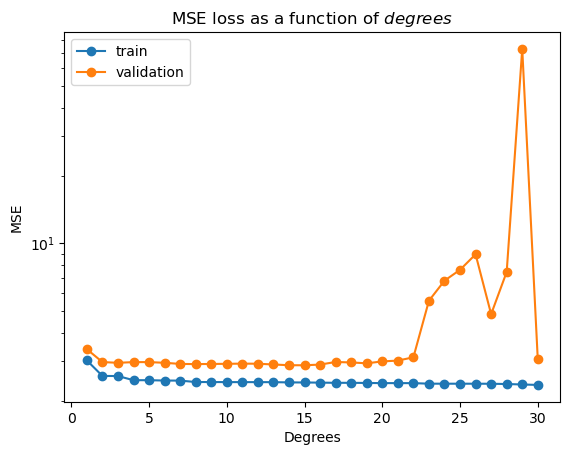

In [37]:
# your code here

plt.plot(degrees, train_mses, label='train', marker='o')
plt.plot(degrees, val_mses, label='validation', marker='o')
plt.xlabel('Degrees')
plt.ylabel('MSE')
plt.title('MSE loss as a function of $degrees$')
plt.legend();
plt.yscale('log')

In [38]:
# your code here
best_idx = np.argmin(val_mses)
best_degree = degrees[best_idx]

best_mse = val_mses[best_idx]

print(f'The degree with the lowest validation MSE is {best_degree} with a corresponding MSE of {best_mse}')

The degree with the lowest validation MSE is 15 with a corresponding MSE of 2.8801904306464725


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.4</b></div>

Now, with the best degree selected, train the polynomial regression on the **complete training set** (including the observations that you had previously removed to make the validation set). 

Append a new dictionary to your `results` list for this model.

In [39]:
# your code here
poly = PolynomialFeatures(best_degree, include_bias=False)

x_train = df_train["Spreading_factor"].values.reshape(-1, 1)  # Reshape to 2D
x_test = df_test["Spreading_factor"].values.reshape(-1, 1)    # Reshape to 2D


x_poly_train = poly.fit_transform(x_train)


x_poly_test = poly.transform(x_test)


linreg = LinearRegression().fit(x_poly_train, y_train)

y_hat_train = linreg.predict(x_poly_train)
y_hat_test = linreg.predict(x_poly_test)


lin_train_mse = mean_squared_error(y_train, y_hat_train)
lin_test_mse = mean_squared_error(y_test, y_hat_test)

results.append({'model': '3.4', 'train_mse':lin_train_mse, 'test_mse': lin_test_mse})

In [40]:
# Display your results thus far.
pd.DataFrame(results)

,model,train_mse,test_mse
0,2.2,2.661715,2.674863
1,3.4,2.490946,2.736483


In [41]:
grader.check("q3.4")

q3.4 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.5</b></div>

Generate a plot of the data and your regression curve (similar to [Question 2.3](#part2)). Comment on how your model fits the data and compare it to the fit of your "guesstimated" model from [Question 2](#part2solutions).

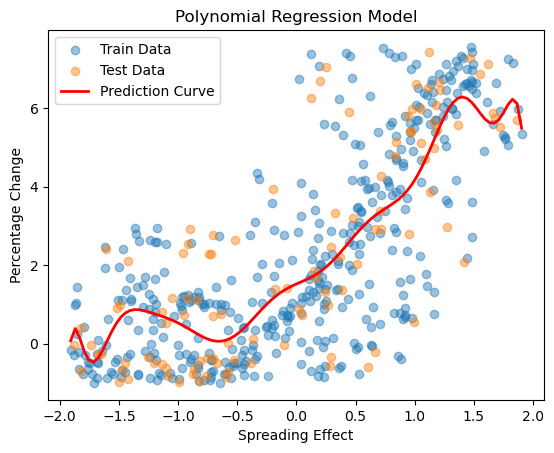

In [42]:
# your code here
plt.scatter(x_train, y_train, alpha=0.45, label='Train Data')
plt.scatter(x_test, y_test, alpha=0.45, label='Test Data')

x_range = np.linspace(min(x_train), max(x_train), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)  
y_pred_range = linreg.predict(x_range_poly)

plt.plot(x_range, y_pred_range, color='red', label='Prediction Curve', linewidth=2)


plt.xlabel('Spreading Effect')
plt.ylabel('Percentage Change')
plt.title('Polynomial Regression Model')
plt.legend()

plt.show()

This model has a lot more oscillations then I was expecting it to, especially near the ends of the available x values. In the middle it appears to be more uniform and similar to my guestimatted model. I actually think my guestimatted model gives a better trend of the data, as reflected by its mse for the test. Regardless, this one better predicts the oscillations of the data that are more specific than the general trend.

<a id="part4"></a>

## <div class='exercise'>Question 4: Finding the best model by k-fold cross validation [14 pts]</div> 

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.1</b></div>

In this part we find the best degree polynomial regression by running the model on a range of degree values and using k-fold cross validation. Note that `cross_validation` should be passed *all* training examples (*not* the 80% split from the previous question).

- Use scikit-learn's `cross_validate(...)` to perform cross validation with $k=10$ for each polynomial regression from **degree 1 to 30 (inclusive)**.
- For each degree:
    - store the mean train MSE across all $k$ folds in the list `train_mses_mean`
    - store the mean validation MSE across all $k$ folds in the list `val_mses_mean`
    - store the standard deviation  of the validation MSE across all $k$ folds in the list `val_mses_std`
    

In [43]:
# your code here
val_mses_mean=[]
train_mses_mean=[]
val_mses_std=[]
degrees_k=[]
i=1
while i<31:
    poly = PolynomialFeatures(i, include_bias=False)

    degrees_k.append(i)


    x_poly_train = poly.fit_transform(x_train)


    x_poly_test = poly.transform(x_test)
    
    linreg = LinearRegression().fit(x_poly_train, y_train)
    model = linreg
    scores = cross_validate(estimator=model,
                            X=x_poly_train,
                            y=y_train,
                            cv=10,
                            scoring='neg_mean_squared_error', # negative MSE because it maximizes
                            return_estimator=False,
                            return_train_score=True) 
    
    
    # Convert negative MSE back to positive
    val_mses_mean.append( -np.mean(scores['test_score']))
    train_mses_mean.append(-np.mean(scores['train_score']))
    val_mses_std.append(np.std(scores['test_score']))
    i=i+1

In [44]:
grader.check("q4.1")

q4.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.2</b></div>

- Generate a single plot showing the mean train and validation $MSE$ values (see note below) for each degree polynomial regression, including the +/- 1 standard deviation bounds for the validation $MSE$ values.
- Comment on trends and findings illustrated by your plot.
- Print the degree of the best model, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.

**NOTE:** When we refer to train and validation $MSE$ values here in Question 4.2 and in future problems where we are performing cross validation, we are referring specifically to the cross-validation generated train and validation $MSE$ values. Just please remember, when accessing your validation $MSE$ values while performing cross validation with scikit-learn's `cross_validate(...)`, scikit-learn rather confusingly refers to its validation scores as `test_score` in the dictionary that it returns, even though those values are actually validation scores. Please see the `cross_validate(...)` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) for more info on this function.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

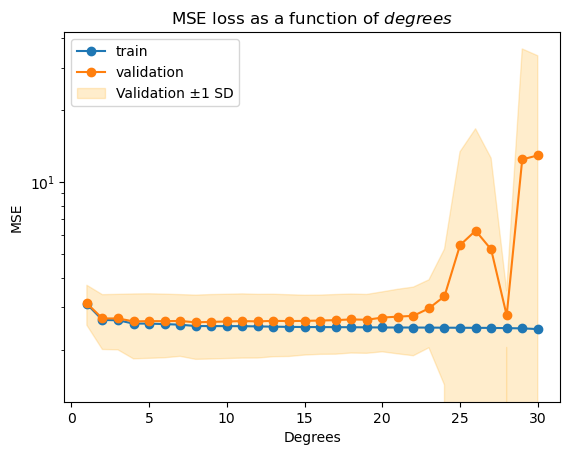

In [45]:
# your code here
degrees_k_plot = np.array(degrees_k)
train_mses_mean_plot = np.array(train_mses_mean)
val_mses_mean_plot = np.array(val_mses_mean)
val_mses_std_plot = np.array(val_mses_std)

plt.plot(degrees_k, train_mses_mean, label='train', marker='o')
plt.plot(degrees_k, val_mses_mean, label='validation', marker='o')

plt.fill_between(degrees_k, 
                 val_mses_mean_plot - val_mses_std_plot, 
                 val_mses_mean_plot + val_mses_std_plot, 
                 color='orange', alpha=0.2, label='Validation ±1 SD')
plt.xlabel('Degrees')
plt.ylabel('MSE')
plt.title('MSE loss as a function of $degrees$')
plt.legend();
plt.yscale('log')


It looks like after the firsy degree it starts to stagnate in terms of MSE until it gets to about past 20 degrees. At that point the MSES starts to change much more extremely with high standard deviations. As such, it looks like degrees between two and 20 seem to be pretty decent fits in terms of MSE, going beyond that will cause pretty high overfitting error.

In [46]:
best_idx = np.argmin(val_mses_mean)
best_degree = degrees_k[best_idx]

best_mse = val_mses_mean[best_idx]
best_train_mse = train_mses_mean[best_idx]

print(f'The degree with the lowest validation MSE is {best_degree} with a corresponding MSE of {best_mse} and a corresponding train MSE of{best_train_mse}') 

The degree with the lowest validation MSE is 8 with a corresponding MSE of 2.5990753511998643 and a corresponding train MSE of2.5081491803463067


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.3</b></div>

Fit the best model based on the entire training data and report the $MSE$.


- For the best degree polynomial regression identified in Question 4.2 above, train on the complete training data and predict on the test data.
- Append a new dictionary for this model to the `results` list. 

In [47]:
# your code here

poly = PolynomialFeatures(best_degree, include_bias=False)

x_train = df_train["Spreading_factor"].values.reshape(-1, 1)  # Reshape to 2D
x_test = df_test["Spreading_factor"].values.reshape(-1, 1)    # Reshape to 2D


x_poly_train = poly.fit_transform(x_train)


x_poly_test = poly.transform(x_test)


linreg = LinearRegression().fit(x_poly_train, y_train)

y_hat_train = linreg.predict(x_poly_train)
y_hat_test = linreg.predict(x_poly_test)


lin_train_mse = mean_squared_error(y_train, y_hat_train)
lin_test_mse = mean_squared_error(y_test, y_hat_test)

results.append({'model': '4.3', 'train_mse':lin_train_mse, 'test_mse': lin_test_mse})

In [48]:
grader.check("q4.3")

q4.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.4</b></div>

- Generate a plot of the data and your regression curve (similar to [Question 2.3](#part2)).
- Display the coefficients of your model.
- Display `results` as a DataFrame (there should now be 3 entries).
- Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated using just a single validation set in [Question 3](#part3solutions).

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

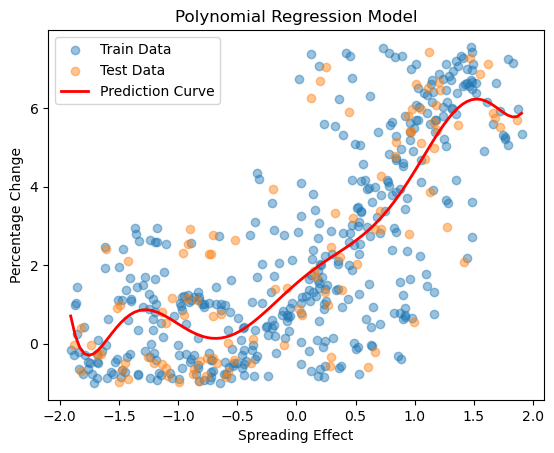

In [49]:
# your code here
plt.scatter(x_train, y_train, alpha=0.45, label='Train Data')
plt.scatter(x_test, y_test, alpha=0.45, label='Test Data')

x_range = np.linspace(min(x_train), max(x_train), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)  
y_pred_range = linreg.predict(x_range_poly)

plt.plot(x_range, y_pred_range, color='red', label='Prediction Curve', linewidth=2)


plt.xlabel('Spreading Effect')
plt.ylabel('Percentage Change')
plt.title('Polynomial Regression Model')
plt.legend()

plt.show()

In [50]:
for i in range(best_degree):
    print(f'The B{i+1} coefficient of the model for 4.3 is: {linreg.coef_[i]}')
print(f'The intercept coefficient of the model for 4.3 is: {linreg.intercept_}')

The B1 coefficient of the model for 4.3 is: 2.597027775111163
The B2 coefficient of the model for 4.3 is: -1.0948684730724927
The B3 coefficient of the model for 4.3 is: -1.1891344117017848
The B4 coefficient of the model for 4.3 is: 3.4831491377615116
The B5 coefficient of the model for 4.3 is: 0.652876640709155
The B6 coefficient of the model for 4.3 is: -1.7130078660041497
The B7 coefficient of the model for 4.3 is: -0.11530516291804033
The B8 coefficient of the model for 4.3 is: 0.24041837351404927
The intercept coefficient of the model for 4.3 is: 1.5353335725001331


In [51]:
pd.DataFrame(results)

,model,train_mse,test_mse
0,2.2,2.661715,2.674863
1,3.4,2.490946,2.736483
2,4.3,2.512517,2.613011


This model appears to be much smoother and less overfit than the single validation set model. It also appears to have the lowest test mse of the three models, showing that it is likely better fit than the single validation one.

<!-- END QUESTION -->

<a id="part5"></a>

## <div class='exercise'>Question 5: Finding the most consistent model using k-fold cross validation with bootstraps [16 pts]</div> 

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.1</b></div>

In the previous part, we used $k$-fold cross validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps in [Question 2.4](#part2) to estimate the confidence intervals of our $\beta_i$ values. In this segment, we will use bootstrapping to test the robustness of our estimation.

- Similar to Question 2.4, **use 100 bootstraps** of your data.
- For each bootstrap:
  - Use scikit-learn's `cross_validate(...)` to perform cross validation with $k=10$ *for each polynomial regression* of **degrees 1 to 30 (inclusive)**.
  - Select the best degree polynomial based on the lowest mean cross-validation MSE and store this degree in a list called `best_degrees`.
- After completing your bootstraps, `best_degrees` should have 100 elements, one degree for each completed bootstrap.

**NOTE:** Once complete, your code for this problem will likely take several minutes to execute. This is to be expected.

In [52]:
# your code here
n_boots=100
boot_models = []
boot_betas = []
best_degrees=[]


for i in range(n_boots):

    boot_i = np.random.choice(len(x_train), replace=True, size=len(x_train)) 

   
    x_train_boot = x_train[boot_i]  
    y_train_boot = y_train[boot_i]  
    
   
   
   
    val_mses_mean=[]
    train_mses_mean=[]
    val_mses_std=[]
    degrees_k=[]
    j=1
    while j<31:
        poly = PolynomialFeatures(j, include_bias=False)
        x_poly_train_boot = poly.fit_transform(x_train_boot.reshape(-1, 1))
        degrees_k.append(j)
    
    
       
        
        linreg = LinearRegression().fit(x_poly_train_boot, y_train_boot)
        model = linreg
        scores = cross_validate(estimator=model,
                                X=x_poly_train_boot,
                                y=y_train_boot,
                                cv=10,
                                scoring='neg_mean_squared_error', # negative MSE because it maximizes
                                return_estimator=False,
                                return_train_score=True) 
        
        
        # Convert negative MSE back to positive
        val_mses_mean.append( -np.mean(scores['test_score']))
        train_mses_mean.append(-np.mean(scores['train_score']))
        val_mses_std.append(np.std(scores['test_score']))
        j=j+1
        
        
       

    
    boot_models.append(boot_linreg)
    
    # Extract and save coefficients from the trained model
    coefs = np.concatenate(([boot_linreg.intercept_], boot_linreg.coef_))  # Combine intercept and coefficients
    boot_betas.append(coefs)
    best_idx = np.argmin(val_mses_mean)
    best_degree = degrees_k[best_idx]
    best_degrees.append(best_degree)
    
    best_mse = val_mses_mean[best_idx]
    best_train_mse = train_mses_mean[best_idx]
    

In [53]:
grader.check("q5.1")

q5.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.2</b></div>

Generate a well-labeled bar plot, with the polynomial degree on the $x$-axis and the number of times that degree was deemed best on the $y$-axis, using the `best_degrees` saved during your bootstraps.

**Hint:** You may want to make use of `Counter` which has been imported for your from the `collections` module of the standard Python library.

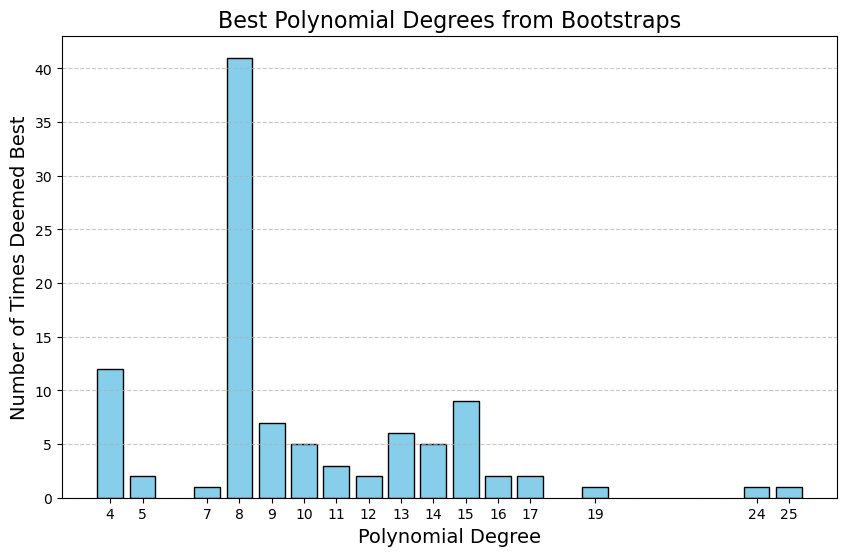

In [54]:
degree_counts = Counter(best_degrees)
degrees = list(degree_counts.keys())
counts = list(degree_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(degrees, counts, color='skyblue', edgecolor='black')


plt.xlabel('Polynomial Degree', fontsize=14)
plt.ylabel('Number of Times Deemed Best', fontsize=14)
plt.title('Best Polynomial Degrees from Bootstraps', fontsize=16)
plt.xticks(degrees) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [55]:
# your code here

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.3</b></div>

What are your observations from the plot above? 

- Why do you see so much variation in the "best degree" over the bootstraps?
- Which degree polynomial regression will you choose as your overall best degree based on your bootstrapped results, and why? 

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

I see a lot of variation in the best degrees over the bootstraps because of the randomness associated with bootstrapping. Due to the central limit theroem, the distribution of best degrees becomes normally distributed as the number of boot straps goes to infinity. As such, we right now are seeing this happen, although in our case it will likely always be right skewed given that in some bootstraps our cross validation may cause over-fitting depending on the bootstrap, however it is less likely to cause underfitting. 

I would choose degree 8 as that has by far most frequent occurences of being the best degree. It was nearly 40 percent of the time for my random bootstraps, while the second most of 9 was only 10 percent. 

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.4</b></div>

Now, with the overall best degree identified with your bootstrapping results above, train the polynomial regression model on the **complete training set**. Append a new dictionary for this model to your `results` list. 

In [56]:
# your code here
poly = PolynomialFeatures(8, include_bias=False)

x_train = df_train["Spreading_factor"].values.reshape(-1, 1)  # Reshape to 2D
x_test = df_test["Spreading_factor"].values.reshape(-1, 1)    # Reshape to 2D


x_poly_train = poly.fit_transform(x_train)


x_poly_test = poly.transform(x_test)


linreg = LinearRegression().fit(x_poly_train, y_train)

y_hat_train = linreg.predict(x_poly_train)
y_hat_test = linreg.predict(x_poly_test)


lin_train_mse = mean_squared_error(y_train, y_hat_train)
lin_test_mse = mean_squared_error(y_test, y_hat_test)

results.append({'model': '5.4', 'train_mse':lin_train_mse, 'test_mse': lin_test_mse})


In [57]:
grader.check("q5.4")

q5.4 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.5</b></div>

- Generate a plot of the data and your regression curve.
- Display `results` as a DataFrame.
- Comment on how your model fits the data and compare it to the fit of your cross-validated model from [Question 4](#part4solutions).

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

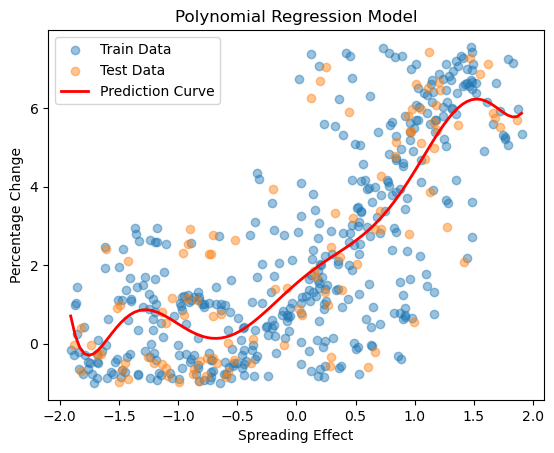

In [58]:
# your code here
plt.scatter(x_train, y_train, alpha=0.45, label='Train Data')
plt.scatter(x_test, y_test, alpha=0.45, label='Test Data')

x_range = np.linspace(min(x_train), max(x_train), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)  
y_pred_range = linreg.predict(x_range_poly)

plt.plot(x_range, y_pred_range, color='red', label='Prediction Curve', linewidth=2)


plt.xlabel('Spreading Effect')
plt.ylabel('Percentage Change')
plt.title('Polynomial Regression Model')
plt.legend()

plt.show()

In [59]:
pd.DataFrame(results)

,model,train_mse,test_mse
0,2.2,2.661715,2.674863
1,3.4,2.490946,2.736483
2,4.3,2.512517,2.613011
3,5.4,2.512517,2.613011


In my current random iteration of bootstraps, the model is exactly the same as the one I got with cross-validation. This makes sense as the most frequent best degree should converge onto the true best one as the number of bootstraps increase via the central limit theroem. Moreover, since it is the most frequent one, we are more likely to get it as compared to each other individual degree. Since it is the same degree, they have the exact same fits.

<!-- END QUESTION -->

<a id="part6"></a>

## <div class='exercise'>Question 6: Improving model consistency with LASSO regularization [26 pts]</div> 

[Return to contents](#contents)

In the previous sections, we compared many polynomial models to find the best degree. For each model of degree $n$, we considered all polynomial coefficients *up to and including* **degree $n$** using `PolynomialFeatures(...)`. In this section we will consider polynomial features of $n=30$, and a **best model** that could be chosen from any possible combination of our 30 degrees.

For instance, we could choose a best model with an arbitrary set of polynomial degrees up degree 30, such as $x^i \in [x^1, x^5, x^{19}, x^{24}]$, rather than the standard approach of using *all* consecutive degrees up to our maximum degree $n=30$ as in $x^i \in [x^1, ... , x^{30}]$.

However, the total number of such possible models for $n=30$ is $2^{30}\approx10^9$, and searching through all of them would be laborious and computationally inefficient. Instead, we can use $LASSO$ (i.e. $L1$) regularization, which "switches off" highly unstable degree coefficients by shrinking them to zero (or very close to zero), thus giving us an efficient solution to this particular combinatorial challenge.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.1</b></div>

**Find the best hyper-parameter alpha, $\alpha$**

Use the `LassoCV` estimator to find the best regularization parameter from $\alpha \in [10^{-5}, 10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}]$
- Store the mean cross-validation MSEs across each fold in `lassoCV_val_mses_mean`
- Save the best $\alpha$ based on the mean cross-validation MSE in `best_alpha`

You should read the documentation for [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Some important information about this estimator:
- After calling `fit`, the model is now the one fit on the entire training data using the best alpha based on the mean CV MSE.
- the `mse_path_` attribute contains the validation scores on each fold for each candidate alpha.
- the `alpha_` attribute contains the best regularization parameter found through cross-validation

**Tips:** You should try adjusting `LassoCV`'s `max_iter` argument to prevent convergence warnings. If you are unable to prevent them with a large number of iterations (~100,000) then you can silence them with:
```{python}
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
```
Do not worry about normalizing your $x$ values for any parts of Question 6. It will not meaningfully affect our final results here.

In [60]:
# your code here

alphas= [10**(-5),10**(-4),10**(-3),10**(-2),10**(-1)]

lasso_CV= LassoCV(alphas=alphas, max_iter=100000,cv=10)
lasso_CV.fit(x_poly_train, y_train)
lassoCV_val_mses_mean= np.mean(lasso_CV.mse_path_, axis=1)
best_alpha = lasso_CV.alpha_

In [61]:
grader.check("q6.1")

q6.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.2</b></div>

Generate two plots:
- One showing the mean validation $MSE$ values for each regularization parameter $\alpha$, identifying the best $\alpha$.
- Another showing the values of each coefficient in the LASSO model using the best $\alpha$. 

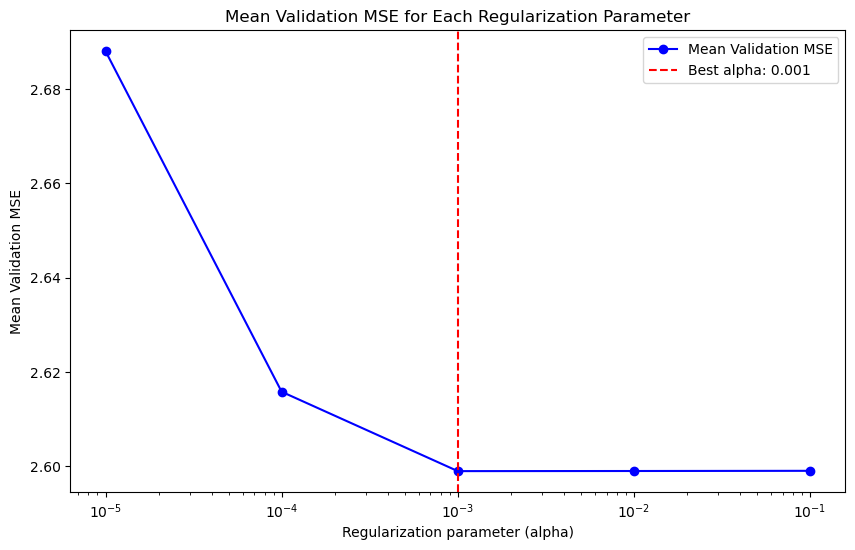

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, lassoCV_val_mses_mean, marker='o', label='Mean Validation MSE', color='blue')
plt.xscale('log')  # Log scale for alphas
plt.xlabel('Regularization parameter (alpha)')
plt.ylabel('Mean Validation MSE')
plt.title('Mean Validation MSE for Each Regularization Parameter')
plt.axvline(best_alpha, linestyle='--', color='red', label=f'Best alpha: {best_alpha}')
plt.legend()
plt.show()

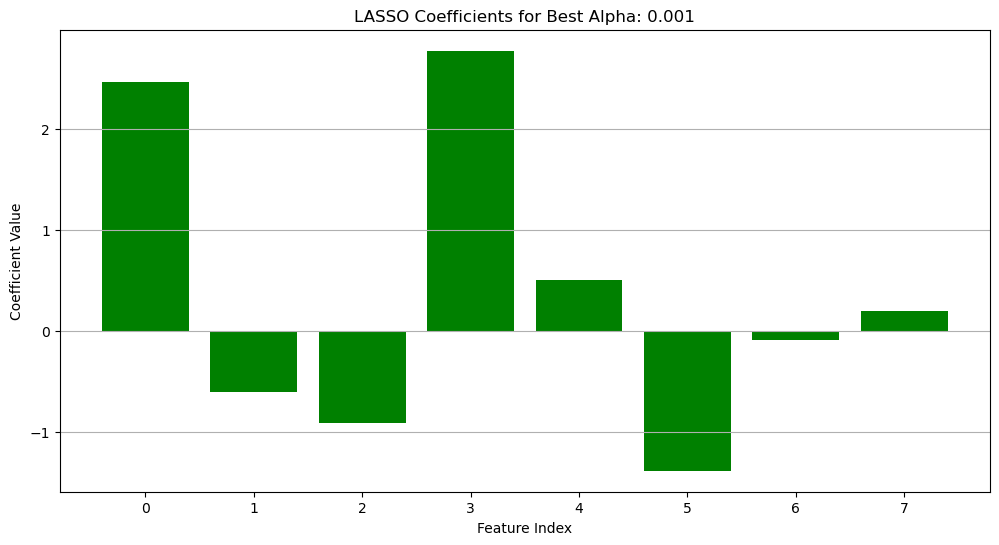

In [63]:
lasso_coef = lasso_CV.coef_


feature_indices = np.arange(len(lasso_coef))


plt.figure(figsize=(12, 6))


plt.bar(feature_indices, lasso_coef, color='green')

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title(f'LASSO Coefficients for Best Alpha: {best_alpha}')


plt.grid(axis='y')

plt.show()

In [64]:
lasso_coef

array([ 2.46588615, -0.6034032 , -0.91568146,  2.77463486,  0.50092885,
       -1.38463125, -0.09073814,  0.19298092])

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.3</b></div>

**Find the most significant degrees**

**NOTE: The code for this question has been provided. It can take several minutes to run. Just be sure to answer the interpretation part of the question.**

From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this best $\alpha$ value to find the "most significant" set of polynomial degrees by using bootstraps.

What we mean by this is, for each bootstrap of the data, you will get some set of degrees that are **significant**, as will be indicated by the value of their coefficients. Typically, while using $LASSO$ regularization, we would consider $\mid\beta_i\mid \gt 0$ as an indication of a particular coefficient's significance. However, for this particular exercise, we are going to use $\mid\beta_i\mid \gt 0.1$ as our criteria for significance (we have found this $0.1$ threshold to work well when designing this particular problem).

Based on this criteria, you will identify which degree coefficients are significant over many bootstrapped iterations with $n=30$ polynomial features and your chosen best $\alpha$ from Question 6.1.

- Use polynomial features with **degree 30**.
- Use a dictionary called `significant_degrees` to store a cumulative count for each degree identified as significant during your bootstraps.
- Run at least 100 bootstraps of your data.
- For each bootstrap:
  - Train a `Lasso(...)` model with the `best_alpha` identified in Question 6.1.
  - Identify the significant polynomial degree coefficients using $\mid\beta_i\mid \gt 0.1 $ as our threshold for significance.
  - For each significant coefficient, update the count of that degree in your `significant_degrees` dictionary.
- Generate a bar plot showing the count for each degree, showing how many times it was identified as significant over your bootstraps.
- Based on this plot, there should likely be a clear maximum degree, above which, few if any iterations have been identified as significant. Interpret your bar plot, choose a maximum degree polynomial based upon it, and explain your rationale for choosing that degree.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

<>:59: SyntaxWarning: invalid escape sequence '\m'
<>:59: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_443/2050706595.py:59: SyntaxWarning: invalid escape sequence '\m'
  f"$\mid\\beta_i\mid > 0.1$ over {numboot} bootstrapped $LASSO$ models "


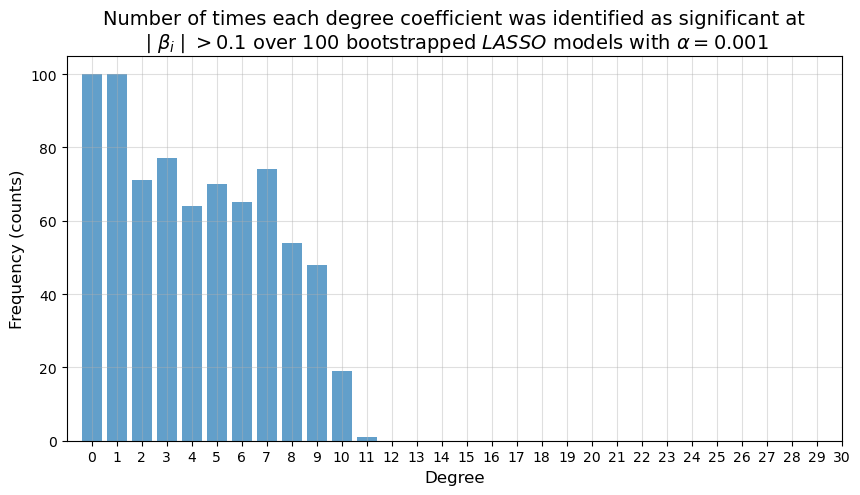

In [65]:
# your code here
# Set bootstrapping parameters
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

numboot = 100
max_degree = 30

significant_degrees = {}

# Perform bootstraps
df_train = pd.read_csv('data/bacteria_train.csv')

include_bias = False # No column of ones from PolynomialFeatures
fit_intercept = True # We will get it from LinearRegression.fit()

for i in range(numboot):
    df_boot = df_train.sample(frac=1, replace=True)
    x_train_boot = df_boot[["Spreading_factor"]]
    x_poly_train_boot = PolynomialFeatures(
        max_degree, include_bias=include_bias
    ).fit_transform(x_train_boot)
    y_train_boot = df_boot.Perc_population

    lasso = Lasso(
        fit_intercept=fit_intercept,
        max_iter=100000,
        alpha=best_alpha,
    )
    lasso.fit(x_poly_train_boot, y_train_boot)
    
    if fit_intercept==True:
        coefficients = [lasso.intercept_, *lasso.coef_]
    else:
        # If you got your constant from PolynomialFeatures and not LinearRegression,
        # then the intercept is actually the first coef in the model.
        # But this would be problematic when using regularization. Can you see why?
        coefficients = lasso.coef_

    for i in np.where(np.abs(coefficients)>0.1)[0]:
        if i not in significant_degrees.keys():
            significant_degrees[i]=1
        else:
            significant_degrees[i]+=1

fig, ax = plt.subplots(figsize=(10,5))

lists = sorted(significant_degrees.items())

x, y = zip(*lists)

ax.bar(x, y, alpha=0.7)
ax.set_xlabel("Degree", fontsize=12)
ax.set_ylabel("Frequency (counts)", fontsize=12)
ax.set_xticks(range(max_degree+1))
ax.set_title(
    "Number of times each degree coefficient was identified as significant at\n"
    f"$\mid\\beta_i\mid > 0.1$ over {numboot} bootstrapped $LASSO$ models "
    f"with $\\alpha={best_alpha}$",
    fontsize=14,
)
plt.grid(":", alpha=0.4)

Looking at this bar graph, it shows that after degree 10, in my first instance at least, no degrees beyond it were considered significant for any of the bootstraps. As such, 10 will be my maximum degree.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.4</b></div>

From our Question 6.3 results, we can see that only some degrees are consistently significant over many bootstraps.

- Use polynomial features based on the maximum degree you identified using your results from Question 6.3 (for the sake of simplicity, use all degrees up to that maximum degree as is typically done in polynomial regression).
- Train your **LASSO** regularized model using your `best_alpha` hyper-parameter on the entire training set.
- Append a new dictionary for this model to your `results` list.

In [66]:
# your code here
poly = PolynomialFeatures(degree=10,include_bias=False)
x_poly_train = poly.fit_transform(x_train)

x_poly_test = poly.transform(x_test)

lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(x_poly_train, y_train)

y_hat_pred = lasso_model.predict(x_poly_train)

y_hat_test = lasso_model.predict(x_poly_test)

train_mse = mean_squared_error(y_train, y_hat_pred)
test_mse = mean_squared_error(y_test, y_hat_test)

results.append({'model': '6.4', 'train_mse':train_mse, 'test_mse': test_mse})


In [67]:
grader.check("q6.4")

q6.4 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.5</b></div>

- Generate a plot of the data and your regression curve.
- Report the polynomial degrees and corresponding coefficients for this fully trained model that have an absolute value greater than 0.1 (i.e. $\mid\beta_i\mid \gt 0.1 $)
- Display `results` as a DataFrame.

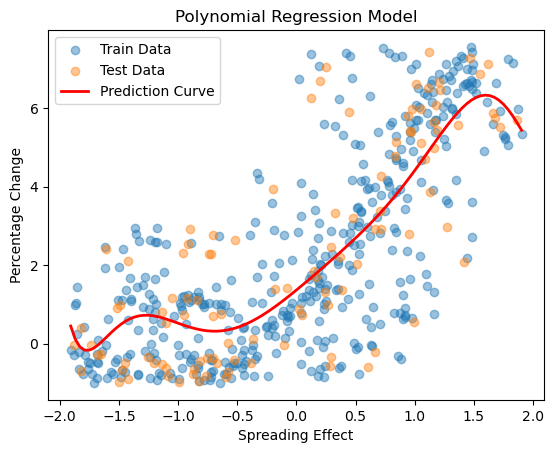

In [73]:
# your code here
plt.scatter(x_train, y_train, alpha=0.45, label='Train Data')
plt.scatter(x_test, y_test, alpha=0.45, label='Test Data')

x_range = np.linspace(min(x_train), max(x_train), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)  
y_pred_range = lasso_model.predict(x_range_poly)

plt.plot(x_range, y_pred_range, color='red', label='Prediction Curve', linewidth=2)


plt.xlabel('Spreading Effect')
plt.ylabel('Percentage Change')
plt.title('Polynomial Regression Model')
plt.legend()

plt.show()

In [85]:
for i in range(10):
    if np.abs(lasso_model.coef_[i])>0.1:
        print(f'The B{i} coefficient of the model for 6.4 is: {lasso_model.coef_[i]} and its corresponding degree term is {i}')
if np.abs(lasso_model.intercept_)>0.1:
    print(f'The intercept coefficient of the model for 6.4 is: {lasso_model.intercept_}')



The B1 coefficient of the model for 6.4 is: 2.4731359868176637 and its corresponding degree term is 1
The B2 coefficient of the model for 6.4 is: 0.5337815299040232 and its corresponding degree term is 2
The B3 coefficient of the model for 6.4 is: -0.881257799487329 and its corresponding degree term is 3
The B4 coefficient of the model for 6.4 is: 0.9294102928185911 and its corresponding degree term is 4
The B5 coefficient of the model for 6.4 is: 0.37148004101964577 and its corresponding degree term is 5
The B6 coefficient of the model for 6.4 is: -0.34205478547339174 and its corresponding degree term is 6
The intercept coefficient of the model for 6.4 is: 1.3667274639378146


In [77]:
pd.DataFrame(results)

,model,train_mse,test_mse
0,2.2,2.661715,2.674863
1,3.4,2.490946,2.736483
2,4.3,2.512517,2.613011
3,5.4,2.512517,2.613011
4,6.4,2.524986,2.611771


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.6</b></div>

**What are your observations?**

- Compare your `best_degree` from [Question 5](#part5solutions) with your chosen degree in 6.4 above and comment on the difference.
- Compare your test $MSE$ in this question with the result from question 5. Which one is smaller, and by how much?
- Which degree coefficients in your best fit model from 6.4 are significant? If not all coefficients are significant, why?
- Would you expect your current model from 6.4 to be more "reliable" or robust than the models in Question 5 and prior? On what basis would you make a claim of its robustness?


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

My best degree from question 5 was 8 while I chose a max degree of 10 for 6.4. The fact that 6.4 had a higher degree makes sense as we are now limiting extreme values of the coefficients for the degrees, allowing us to use more terms without them getting to out of hand/extreme. In reality, only the degrees after 6 for 6.4 all had coefficient absolute values less than 0.1, showing that they did not have that significant of an effect under lasso regression. 

The test MSE for 6.4 is ever so slightly smaller than that of 5.4. 6.4 had a test MSE of 2.612 while 5.4 had a test MSE of 2.613.  6.4 was thus smaller by about 0.001 units.

The degree coefficients that were significant were the following: the intercept,1, 2,3,4,5,6. Not all coefficients were significant because our certain bootstrap of data had a distribution that did not need to include any greater than 6, although in other bootstraps of the data, because of randomness, a greater amount of degrees could be needed.


I would expect the current model from 6.4 to be more reliable than the models in question 5 and prior. I would base this on the fact that it has the lowest test_mse of all the models, which is a pretty decent metric of how generalizable a model can be. Moreover, because we used Lasso Regression, this model helps prevent over-fitting which I fear many of the previous models suffered from.


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

<!-- END QUESTION -->

<a id="part7"></a>

## <div class='exercise'>Question 7: Analyze your best test MSEs for each sub section of the homework [6 pts]</div> 

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q7.1</b></div>

Using the `results` list, generate a bar plot illustrating the test $MSE$ values for each of the models. Display `results` as a Dataframe as well.

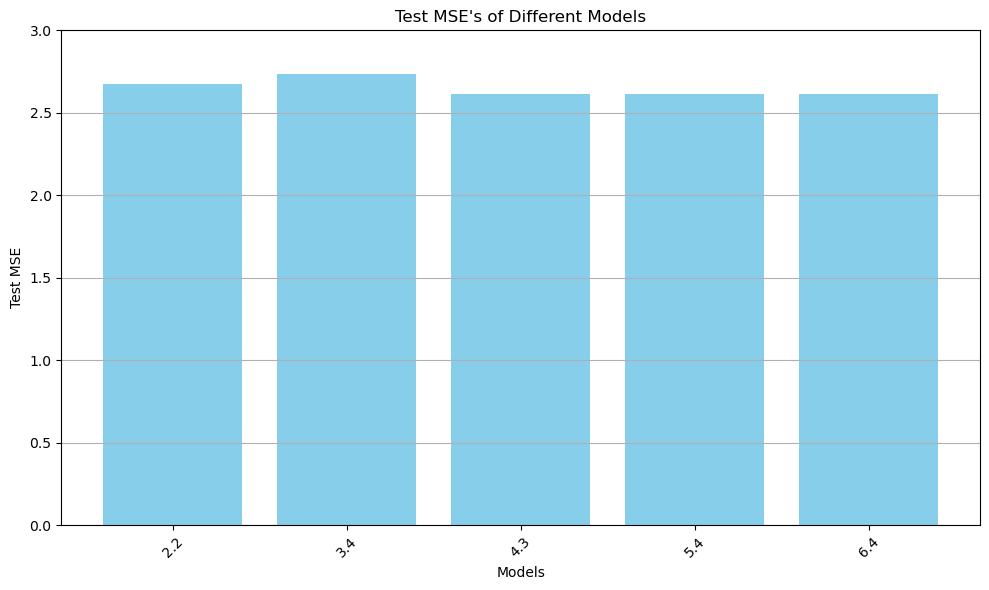

In [94]:
# your code here
results_df = pd.DataFrame(results)




plt.figure(figsize=(10, 6))
plt.bar(results_df['model'], results_df['test_mse'], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Test MSE')
plt.title("Test MSE's of Different Models")
plt.xticks(rotation=45)
plt.ylim(0, 3) 
plt.grid(axis='y')


plt.tight_layout()
plt.show()

In [92]:
results_df

,model,train_mse,test_mse
0,2.2,2.661715,2.674863
1,3.4,2.490946,2.736483
2,4.3,2.512517,2.613011
3,5.4,2.512517,2.613011
4,6.4,2.524986,2.611771


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q7.2</b></div>

Which model do you think is best, and why? What are some of that model's drawbacks compared to the other models? 

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

I think model 6.4 is the best as it has the lowest test_mse and likely does the best at avoiding over-fitting, excluding my guestimatte. The drawback of this model is that it has a higher train_mse as compared to other models (which is perhaps just a sign of it not being overfit), which indicates that it may as a result of the lasso regularization suffer from under-fitting data. Also, for large datasets with a lot of features, Lasso can be very computationally intensive. As such, it may be less efficient computationally as compared to the other ones.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

<!-- END QUESTION -->

<div class="alert alert-info" style="color: #4a4a4a; background-color: #fbe8ff; border-color: #eed4db; border-width: 1px; border-radius: 3px; padding: 10px;">

**Wrap-up**

* Please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation. This is also a good place to ask any remaining questions you may have.

* How many hours did you spend working on this assignment? Store this as an int or float in `hours_spent_on_hw`. If you worked on the project in a group, report the *average* time spent per person.

</div>

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

I found the probability part to be the most challengi

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [95]:
hours_spent_on_hw = 10

In [96]:
grader.check("wrapup")

wrapup results: All test cases passed!

In [72]:
notebook_end = time.time()
print(f"It took {(notebook_end - notebook_start)/60:.2f} minutes for this notebook to run")

It took 2.95 minutes for this notebook to run


🌈 **This concludes HW3. Thank you!**

[Return to contents](#contents)